# Homework 4. Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 1. (0.5 points) Read wine dataset. How many rows and how many columns the dataset has?

In [2]:
data=pd.read_excel('Wine_data.xlsx')

In [3]:
data.head()

,Customer Last Name,Offer N,Gender,Discount,Varietal,Customer_Segment,Minimum Qty (kg),Origin,Campaign,Past Peak
0,Smith,2,Male,17,Pinot Noir,Segment 4,72.0,France,January,False
1,Smith,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12.0,Germany,July,False
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144.0,Australia,October,False


# 2. (0.5 points) How many numeric and non-numeric variables are in the data?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Last Name  324 non-null    object 
 1   Offer N             324 non-null    int64  
 2   Gender              324 non-null    object 
 3   Discount            324 non-null    int64  
 4   Varietal            323 non-null    object 
 5   Customer_Segment    324 non-null    object 
 6   Minimum Qty (kg)    323 non-null    float64
 7   Origin              324 non-null    object 
 8   Campaign            324 non-null    object 
 9   Past Peak           322 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 25.4+ KB


> **There are 3 numeric and 7 non-numeric data.**

# 3. (0.5 points) How many missing values does each variable contain?

In [5]:
data.isna().sum()

Customer Last Name    0
Offer N               0
Gender                0
Discount              0
Varietal              1
Customer_Segment      0
Minimum Qty (kg)      1
Origin                0
Campaign              0
Past Peak             2
dtype: int64

> **Varietal and Minimum Qty (kg) columns contain 1 missing values each, and Past Peak contains 2 missing values.**

# 4. (0.5 points) If there are numeric variables that have missing values then replace the missing values with median value of a respective column. If there are missing values in object variables, drop those missing values. 

In [6]:
# filling in missing values with median
data['Minimum Qty (kg)'].fillna(data['Minimum Qty (kg)'].median(),inplace=True)

In [7]:
data['Minimum Qty (kg)'].isna().sum()

0

In [8]:
# Dropping missing values of object-type variables
data.dropna(inplace=True)

In [9]:
data.isna().sum()

Customer Last Name    0
Offer N               0
Gender                0
Discount              0
Varietal              0
Customer_Segment      0
Minimum Qty (kg)      0
Origin                0
Campaign              0
Past Peak             0
dtype: int64

# 5. (0.5 points) In some of the column headings, there are spaces or parenthesis, replace them with underscore - “_”. 

In [10]:
new_cols=[]
for i in data.columns:
    new_cols.append(i.replace('(','_').replace(')','_').replace(' ','_'))

data.columns=new_cols
print(data.columns)

Index(['Customer_Last_Name', 'Offer_N', 'Gender', 'Discount', 'Varietal',
       'Customer_Segment', 'Minimum_Qty__kg_', 'Origin', 'Campaign',
       'Past_Peak'],
      dtype='object')


# 6. (1.5) Calculate the following measures by using numpy module: 
- • average discount, STDEV discount, 
- • average minimum quantity, 
- • median minimum quantity, 
- • 66 percentiles of minimum quantity,
- • 79 percentiles of discount

In [11]:
#you can use functions from numpy module as well
print('average discount is',data.Discount.mean())
print('STDEV discount is',data.Discount.std())
print('median minimum quantity is ',data.Minimum_Qty__kg_.median())
print('66 percentiles of minimum quantity is', data.Minimum_Qty__kg_.quantile(0.66))
print('79 percentiles of discount is', data.Minimum_Qty__kg_.quantile(0.79))

average discount is 59.517133956386296
STDEV discount is 20.313031205610944
median minimum quantity is  72.0
66 percentiles of minimum quantity is 72.0
79 percentiles of discount is 72.0


# 7. (1 points) Use for loop to print value_count() for the following variables: Gender, Varietal, Customer_Segment, Origin.

In [12]:
for i in ['Gender', 'Varietal', 'Customer_Segment', 'Origin']:
    print('\n',i,'\n')
    print(data[i].value_counts())


 Gender 

Male      161
Female    160
Name: Gender, dtype: int64

 Varietal 

Champagne             79
Pinot Noir            43
Prosecco              43
Espumante             40
Malbec                32
Cabernet Sauvignon    32
Merlot                20
Pinot Grigio          17
Chardonnay            15
Name: Varietal, dtype: int64

 Customer_Segment 

Segment 1    124
Segment 2     94
Segment 3     73
Segment 4     30
Name: Customer_Segment, dtype: int64

 Origin 

France          126
Australia        39
Chile            37
Oregon           26
South Africa     25
Italy            23
Germany          16
California       16
New Zealand      13
Name: Origin, dtype: int64


# 8. (1 points) Use a for loop to visualize distribution of all the numeric variables in the dataset.

Offer_N


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


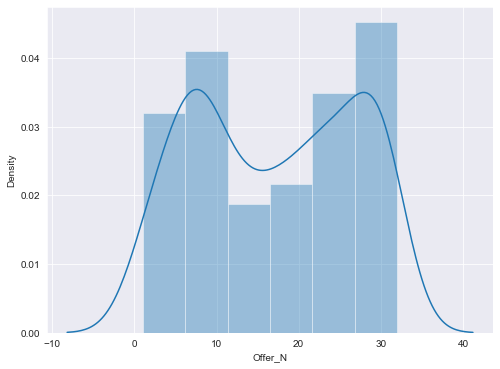

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Discount


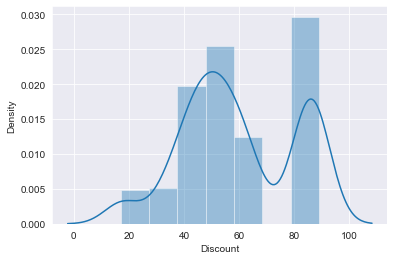

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Minimum_Qty__kg_


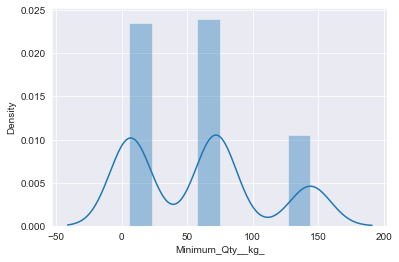

In [13]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
for i in data.select_dtypes(exclude='object').columns:
    sns.distplot(data[i])
    print(i)
    plt.show()

# 9. (3 points) Visualize relationships below by using either matplotlib.pyplot OR seaborn modules. This script here might be helpful if you are not sure what types of charts to choose. You are free to use other types of charts as well. You should use at least two different types of charts.

### a. Relationship between “Gender” and “Minimum Qty (kg)”

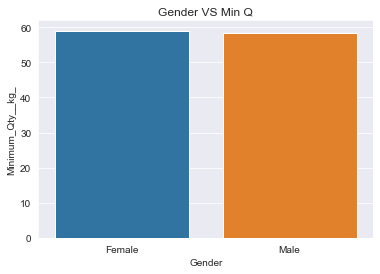

In [14]:
#column chart
sns.barplot(x=data[['Gender','Minimum_Qty__kg_']].groupby('Gender').mean().reset_index()['Gender'],
           y=data[['Gender','Minimum_Qty__kg_']].groupby('Gender').mean().reset_index()['Minimum_Qty__kg_']
           )
plt.title('Gender VS Min Q')

plt.show()

## b. Relationship between “Origin” and “Minimum Qty (kg)”

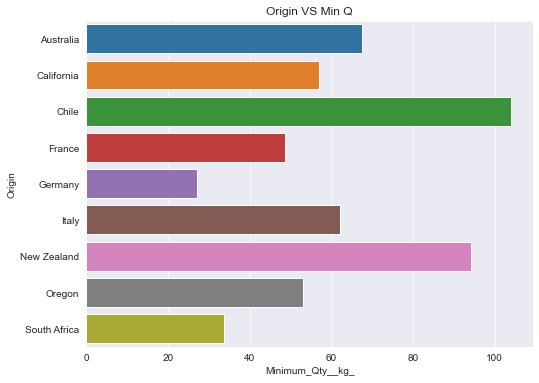

In [15]:
#bar chart
plt.figure(figsize=(8,6))
sns.barplot(y=data[['Origin','Minimum_Qty__kg_']].groupby('Origin').mean().reset_index()['Origin'],
           x=data[['Origin','Minimum_Qty__kg_']].groupby('Origin').mean().reset_index()['Minimum_Qty__kg_']
           )
plt.title('Origin VS Min Q')

plt.show()

## c. Relationship between “Minimum Qty (kg)” and “Discount”

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


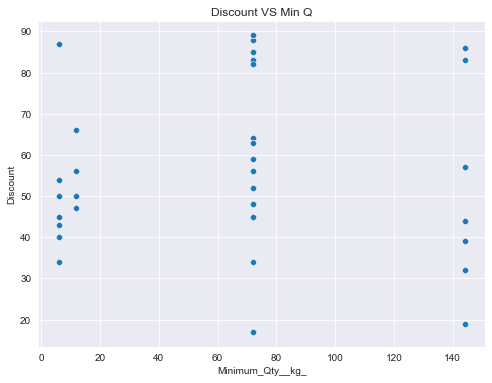

In [16]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data.Minimum_Qty__kg_, data.Discount)

plt.title('Discount VS Min Q')

plt.show()

# d. Relationship between “Varietal” and “Origin”

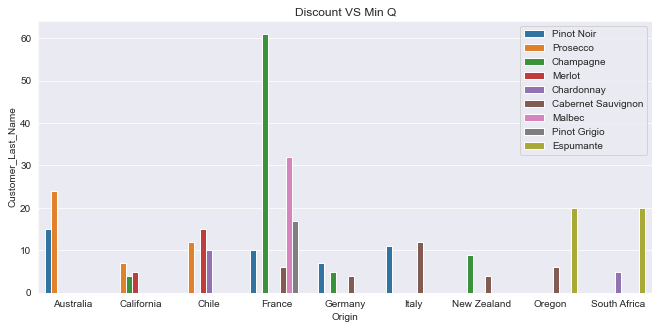

In [17]:
#scatter plot
plt.figure(figsize=(11,5))

sns.barplot(x=data[['Origin','Varietal','Customer_Last_Name']].groupby(['Origin','Varietal'])['Customer_Last_Name'].agg('count').reset_index()['Origin'],
           y=data[['Origin','Varietal','Customer_Last_Name']].groupby(['Origin','Varietal'])['Customer_Last_Name'].agg('count').reset_index()['Customer_Last_Name'],
           hue=data[['Origin','Varietal','Customer_Last_Name']].groupby(['Origin','Varietal'])['Customer_Last_Name'].agg('count').reset_index()['Varietal'])

plt.legend(loc='upper right')
plt.title('Discount VS Min Q')

plt.show()

# e. Correlation between all numeric variables in the data

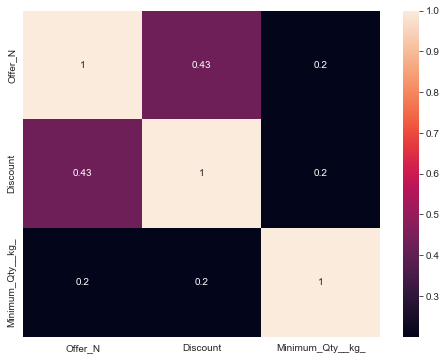

In [18]:
plt.figure(figsize=(8,6))


sns.heatmap(data.corr().abs(),annot=True)
plt.show()

# 10. (1 points) Run a t-test to see whether there is a statistically significant difference between female and male wine buyers in terms of average “Minimum Qty (kg)” bought? Interpret the results.

In [19]:
ttest_ind(data['Minimum_Qty__kg_'][data['Gender']=='Female'],
          data['Minimum_Qty__kg_'][data['Gender']=='Male']
         )

Ttest_indResult(statistic=0.11940445515514647, pvalue=0.9050300923363799)

> **The T-test results show that “Minimum Qty (kg)” is NOT statistically significantly different between male and female buyers.**

# Premium question (3 points)

> Code the values of Discount column into the following ranges: if discount is less 
than 50% then “less than 50%”, if it’s in the range of [50%,70%] then “from 50% 
to 70%”, the rest of the values should be coded as “More than 70%”. Add coded 
values to the dataset with column name being “Discount_Coded”. Create a bar 
chart that will show average “Minimum Qty (kg)” by the categories of 
“Discount_Coded”.

In [20]:
def code_values(discount):
    if discount<50:
        new_value='less than 50%'
    elif discount>=50 and discount<=70:
        new_value='[50%,70%]'
    else:
        new_value='More than 70%'
    return new_value

In [21]:
data.reset_index(inplace=True)
data.drop(columns=['index'],axis=1,inplace=True) #resetting index
data.head()

,Customer_Last_Name,Offer_N,Gender,Discount,Varietal,Customer_Segment,Minimum_Qty__kg_,Origin,Campaign,Past_Peak
0,Smith,2,Male,17,Pinot Noir,Segment 4,72.0,France,January,False
1,Smith,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12.0,Germany,July,False
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144.0,Australia,October,False


In [22]:
discount_new=[]
for i in range(len(data.Discount)):
    discount_new.append(code_values(data.Discount[i]))
data['Discount_Coded']=discount_new

In [23]:
data[['Discount','Discount_Coded']].head()

,Discount,Discount_Coded
0,17,less than 50%
1,34,less than 50%
2,47,less than 50%
3,34,less than 50%
4,83,More than 70%


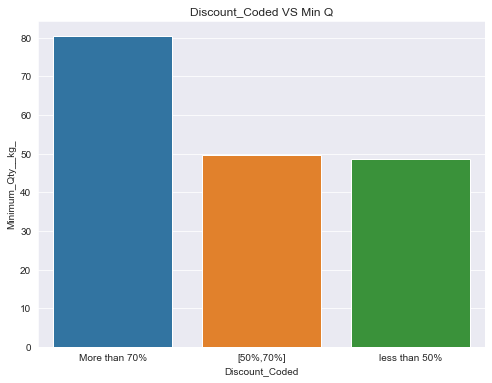

In [24]:
#bar chart
plt.figure(figsize=(8,6))
sns.barplot(y=data[['Minimum_Qty__kg_','Discount_Coded']].groupby('Discount_Coded').mean().reset_index()['Minimum_Qty__kg_'],
           x=data[['Minimum_Qty__kg_','Discount_Coded']].groupby('Discount_Coded').mean().reset_index()['Discount_Coded']
           )
plt.title('Discount_Coded VS Min Q')

plt.show()